In [1]:
!git clone https://github.com/minhquan6203/ML-basic
!git clone https://github.com/minhquan6203/Flower-Classify

Cloning into 'ML-basic'...
remote: Enumerating objects: 419389, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 419389 (delta 8), reused 10 (delta 3), pack-reused 419372
Receiving objects: 100% (419389/419389), 354.61 MiB | 30.11 MiB/s, done.
Resolving deltas: 100% (165461/165461), done.
Updating files: 100% (105333/105333), done.
Cloning into 'Flower-Classify'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 77 (delta 36), reused 52 (delta 16), pack-reused 0
Unpacking objects: 100% (77/77), 785.87 KiB | 7.78 MiB/s, done.


In [19]:
!python /content/Flower-Classify/train.py \
    --train_path /content/ML-basic/MNIST_VGG/train \
    --valid_path /content/ML-basic/MNIST_VGG/val  \
    --type_model "LeNet5" \
    --image_H 224 \
    --image_W 224 \
    --batch_size 8 \
    --num_classes 10 \
    --num_epochs 2

2023-04-03 09:18:31.876303: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-03 09:18:34.808653: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Found 50006 files belonging to 10 classes.
Found 10001 files belonging to 10 classes.
Epoch 1/2
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
6251/6251 [==============================] - 73s 11ms/step - loss: 0.4890 - accuracy: 0.9327 - val_loss: 0.1354 - val_accuracy: 0.9571
Epoch 2/2
6251/6251 [==============================] - 69s 11ms/step - loss: 0.1385 - accuracy: 0.9598 - val_loss: 0.1768 - val_accurac

In [20]:
!python /content/Flower-Classify/evaluation.py \
    --test_path  /content/ML-basic/MNIST_VGG/test\
    --image_H 224 \
    --image_W 224 \
    --batch_size 8 \
    --checkpoint_path /content/save

2023-04-03 09:21:24.119602: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-03 09:21:26.975251: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Found 9993 files belonging to 10 classes.
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
1250/1250 [==============================] - 11s 8ms/step - loss: 0.1269 - accuracy: 0.9587
Test accuracy: 0.9586710929870605


In [6]:
!pip install wget
import wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=1a67dc75d66a10cc79e515d675d78fa4e87fb257b731132c548b98288a6fecf4
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [7]:
!wget https://toplist.vn/images/800px/so-5-co-y-nghia-gi-626436.jpg

--2023-04-03 08:54:32--  https://toplist.vn/images/800px/so-5-co-y-nghia-gi-626436.jpg
Resolving toplist.vn (toplist.vn)... 45.117.82.168
Connecting to toplist.vn (toplist.vn)|45.117.82.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102736 (100K) [image/jpeg]
Saving to: ‘so-5-co-y-nghia-gi-626436.jpg’

so-5-co-y-nghia-gi- 100%[===================>] 100.33K   337KB/s    in 0.3s    

2023-04-03 08:54:34 (337 KB/s) - ‘so-5-co-y-nghia-gi-626436.jpg’ saved [102736/102736]



In [21]:
import tensorflow as tf
model = tf.keras.models.load_model("/content/save/best_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 44944)             0         
                                                                 
 dense (Dense)               (None, 120)               5

1/1 [==============================] - 0s 125ms/step
số này là:  5


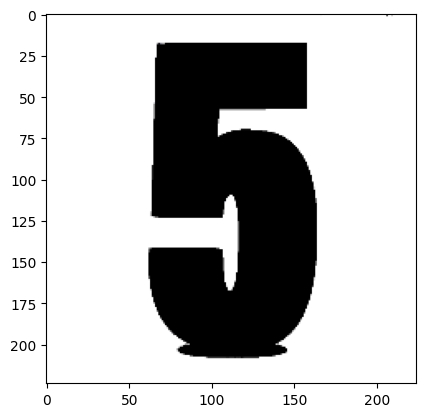

In [23]:
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import numpy as np
CATEGORIES = ["0", "1",'2','3','4','5','6','7','8','9']

def prepare(filepath):
  IMG_SIZE = 224
  img_array = cv2.imread(filepath)
  h,w,bpp = np.shape(img_array)
  for py in range(0,h):
    for px in range(0,w):
        if(img_array[py][px][0] <200):            
            img_array[py][px][0]=0
            img_array[py][px][1]=0
            img_array[py][px][2]=0
        if(img_array[py][px][0] >200):            
            img_array[py][px][0]=255
            img_array[py][px][1]=255
            img_array[py][px][2]=255
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  
  plt.imshow(new_array)
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("/content/save/best_model.h5")

prediction = model.predict([prepare("/content/so-5-co-y-nghia-gi-626436.jpg")])
print('số này là: ',CATEGORIES[np.argmax(prediction)])